<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Correlations

In this exercise, we are going to focus on using visual and basic statistical techniques to understand relationships between variables in a modeling problem.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Background on the data

In this example we will be working with data collected from a Combined Cycle Power Plant over 6 years (2006-2011). Our objective would be to predict the net hourly electrical energy output (EP) of the plant.  To do so we have data on several environmental characteristics taken at hourly timestamps, which are taken as averages from various sensors located around the plant: 
- AT: Ambient Temperature in °C,
- AP: Ambient Pressure in milibar,
- RH: Relative Humidity in %
- V: Exhaust Vacuum in cm Hg
- PE (target): Net hourly electrical energy output in MW  

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has effect on the Steam Turbine, the other three ambient variables affect the GT performance.

Data available at https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [8]:
# Read in the data
data = pd.read_excel('CCPP_data.xls',sheet_name=None)
ccpp_data = pd.concat((data[key] for key in data.keys()),axis=0)
ccpp_data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Pairplots

One handy way to quickly examine the relationships between variables in your data is using what we call "pairplots", which are simply plots of one variable against each other. Rather than generating these all manually, we can use the seaborn package's `sns.pairplot()` function to generate them for every variable in our data against all others.  We need to specify our dataset and also in the case below we will display a histogram of each variable as well as the pairplots.

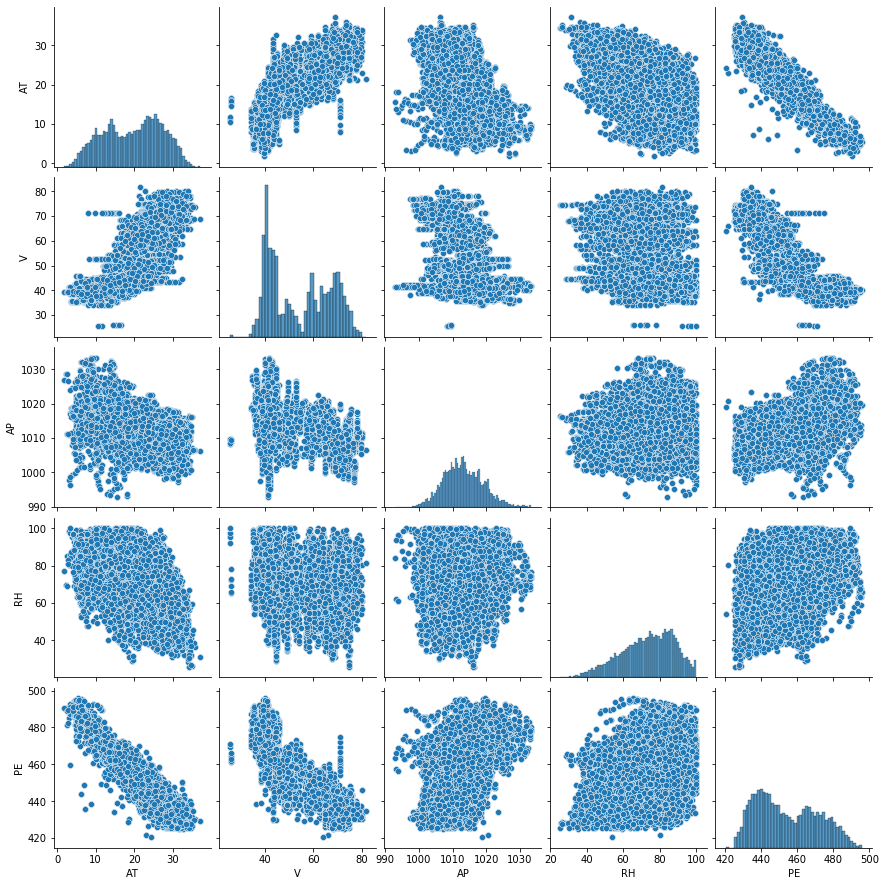

In [10]:
# Display a pairplot to look at relationships between variables
sns.pairplot(data=ccpp_data,diag_kind='hist')
plt.show()

### Correlation matrix

If we examine the pairplots above we can see some of our variables appear to have relationships with others as well as with our target variable PE.  We can quantify those relationships by calculating the correlation coefficient between each pair of variables.  Again, rather than doign this manually, pandas gives us a quick way to do so using `df.corr(method='pearson')`.  We can then visualize the correlation coefficient values in a heatmap using `sns.heatmap()`.

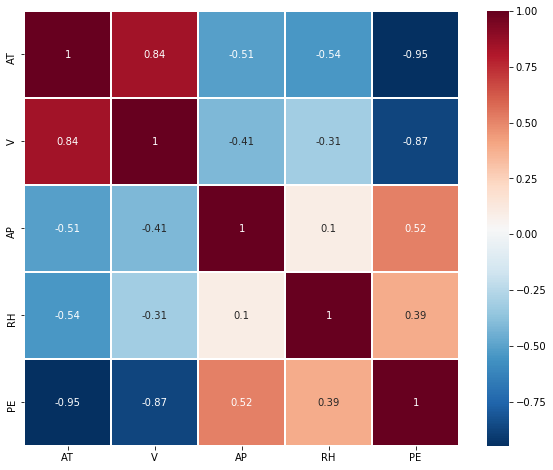

In [11]:
# Examine correlations between variables using correlation matrix
plt.figure(figsize=(10,8))
cm = ccpp_data.corr(method='pearson')
sns.heatmap(cm, annot=True, cmap = 'RdBu_r',linewidth=0.5,square=True)
plt.show()